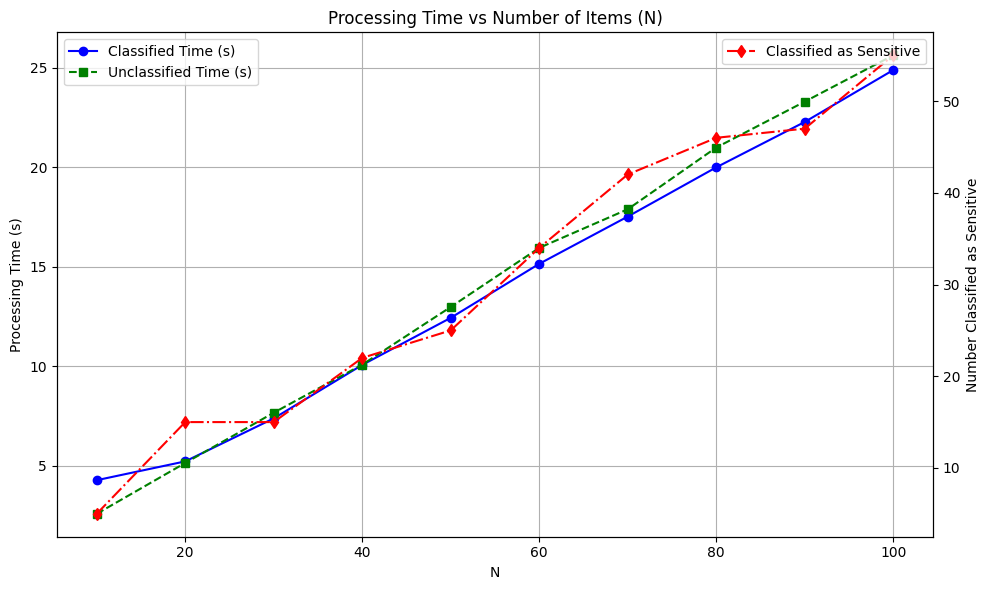

In [1]:
import matplotlib.pyplot as plt

# Data
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
classified = [4.2832, 5.2283, 7.3887, 10.0737, 12.4396, 15.1532, 17.5260, 19.9992, 22.2804, 24.8864]
unclassified = [2.5953, 5.1488, 7.6733, 10.0878, 12.9845, 15.9549, 17.8931, 20.9939, 23.2994, 25.6290]
classified_sensitive = [5, 15, 15, 22, 25, 34, 42, 46, 47, 55]

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot classified and unclassified times
ax1.plot(N, classified, 'o-', label='Classified Time (s)', color='blue')
ax1.plot(N, unclassified, 's--', label='Unclassified Time (s)', color='green')
ax1.set_xlabel('N')
ax1.set_ylabel('Processing Time (s)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create second y-axis for classified as sensitive count
ax2 = ax1.twinx()
ax2.plot(N, classified_sensitive, 'd-.', label='Classified as Sensitive', color='red')
ax2.set_ylabel('Number Classified as Sensitive')
ax2.legend(loc='upper right')

plt.title('Processing Time vs Number of Items (N)')
plt.tight_layout()
plt.show()


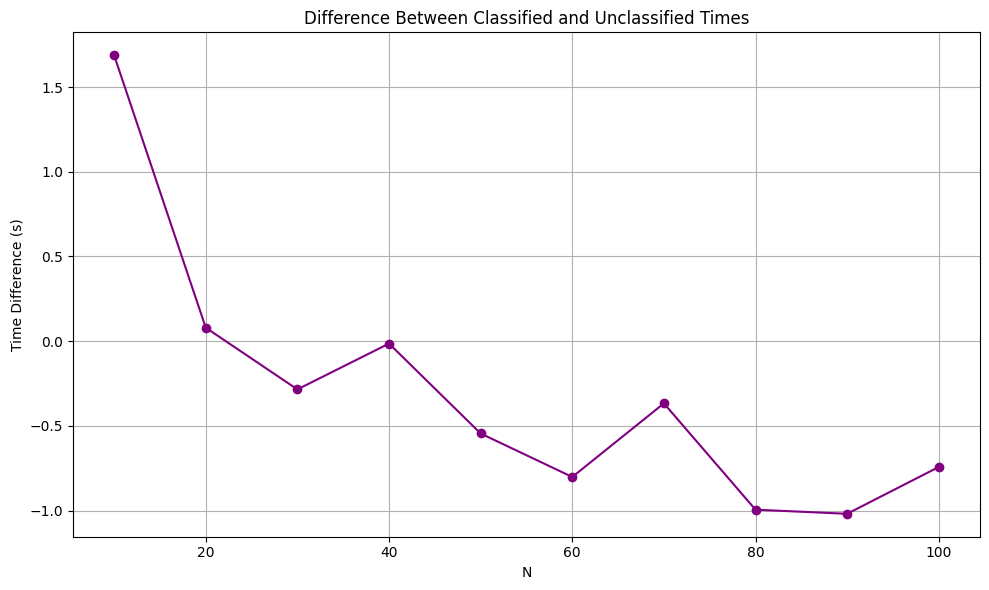

In [2]:

# Data
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
classified = [4.2832, 5.2283, 7.3887, 10.0737, 12.4396, 15.1532, 17.5260, 19.9992, 22.2804, 24.8864]
unclassified = [2.5953, 5.1488, 7.6733, 10.0878, 12.9845, 15.9549, 17.8931, 20.9939, 23.2994, 25.6290]

# Calculate the difference
time_diff = [c - u for c, u in zip(classified, unclassified)]

# Plot the difference
plt.figure(figsize=(10, 6))
plt.plot(N, time_diff, marker='o', linestyle='-', color='purple')
plt.title('Difference Between Classified and Unclassified Times')
plt.xlabel('N')
plt.ylabel('Time Difference (s)')
plt.grid(True)
plt.tight_layout()
plt.show()


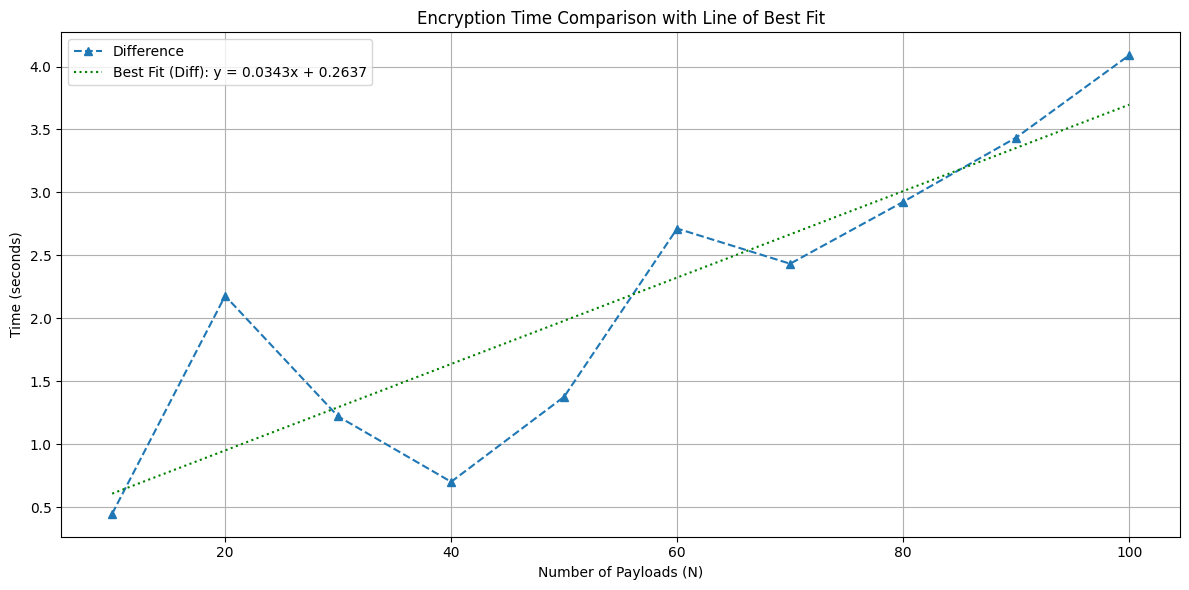

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample results from your test
data = [
    (10, 8.7535, 9.2003),
    (20, 18.0446, 20.2226),
    (30, 26.0999, 27.3201),
    (40, 34.3942, 35.0951),
    (50, 41.6367, 43.0132),
    (60, 49.2771, 51.9899),
    (70, 58.1316, 60.5650),
    (80, 65.8434, 68.7683),
    (90, 74.2318, 77.6674),
    (100, 82.3702, 86.4597),
]

# Extract values
N = [row[0] for row in data]
classified = [row[1] for row in data]
unclassified = [row[2] for row in data]
difference = [u - c for u, c in zip(unclassified, classified)]

# Fit a line to the difference data (1st degree polynomial: y = mx + b)
coeffs = np.polyfit(N, difference, deg=1)
best_fit = np.poly1d(coeffs)
fit_values = best_fit(N)

# Plot
plt.figure(figsize=(12, 6))
# plt.plot(N, classified, label="Classified (Selective Encryption)", marker="o")
# plt.plot(N, unclassified, label="Unclassified (Encrypt All)", marker="s")
plt.plot(N, difference, label="Difference", marker="^", linestyle="--")
plt.plot(N, fit_values, label=f"Best Fit (Diff): y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}", linestyle=":", color="green")

# Labels
plt.title("Encryption Time Comparison with Line of Best Fit")
plt.xlabel("Number of Payloads (N)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
